In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('./Tips Dataset (2024 Istanbul).csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df=pd.read_csv('./Tips Dataset (2024 Istanbul).csv')
df['sitting_time']=df['sitting_time'].str.replace("min","")
df['sitting_time']=pd.to_numeric(df['sitting_time'])

In [5]:
df.head()

,Unnamed: 0,person,total,cuisine,restaurant,sitting_time,payment_type,tips
0,0,2,819,vegetarian,Restaurant_5,142,credit_card,125
1,1,3,1011,chinese,Restaurant_3,54,credit_card,145
2,2,6,4224,kebab,Restaurant_9,112,cash,330
3,3,8,1142,seafood,Restaurant_2,202,cash,245
4,4,1,519,world,Restaurant_5,98,cash,100


In [7]:
y=df['tips']
x=df[['person','total','sitting_time']]

In [8]:
lr=LinearRegression()
model=lr.fit(x,y)

In [9]:
model.predict([[5,2000,120]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([263.96275384])

In [10]:
model.score(x,y)

0.46739187210457445

In [11]:
model.coef_

array([-5.09876972,  0.11417375,  0.45184123])

In [12]:
tahmin_tip=model.predict(x)
df['tahmin_tip']=tahmin_tip

df.head(10)

,Unnamed: 0,person,total,cuisine,restaurant,sitting_time,payment_type,tips,tahmin_tip
0,0,2,819,vegetarian,Restaurant_5,142,credit_card,125,154.360367
1,1,3,1011,chinese,Restaurant_3,54,credit_card,145,131.420930
2,2,6,4224,kebab,Restaurant_9,112,cash,330,509.171682
3,3,8,1142,seafood,Restaurant_2,202,cash,245,187.756345
4,4,1,519,world,Restaurant_5,98,cash,100,105.325997
5,5,1,335,iskender,Restaurant_1,221,cash,105,139.894497
6,6,1,1046,vegetarian,Restaurant_2,171,cash,210,198.479975
7,7,4,2431,world,Restaurant_8,108,meal_card,205,312.848317
8,8,7,1315,seafood,Restaurant_9,230,meal_card,230,225.258728
9,9,8,1345,fast_food,Restaurant_6,94,credit_card,320,162.134764


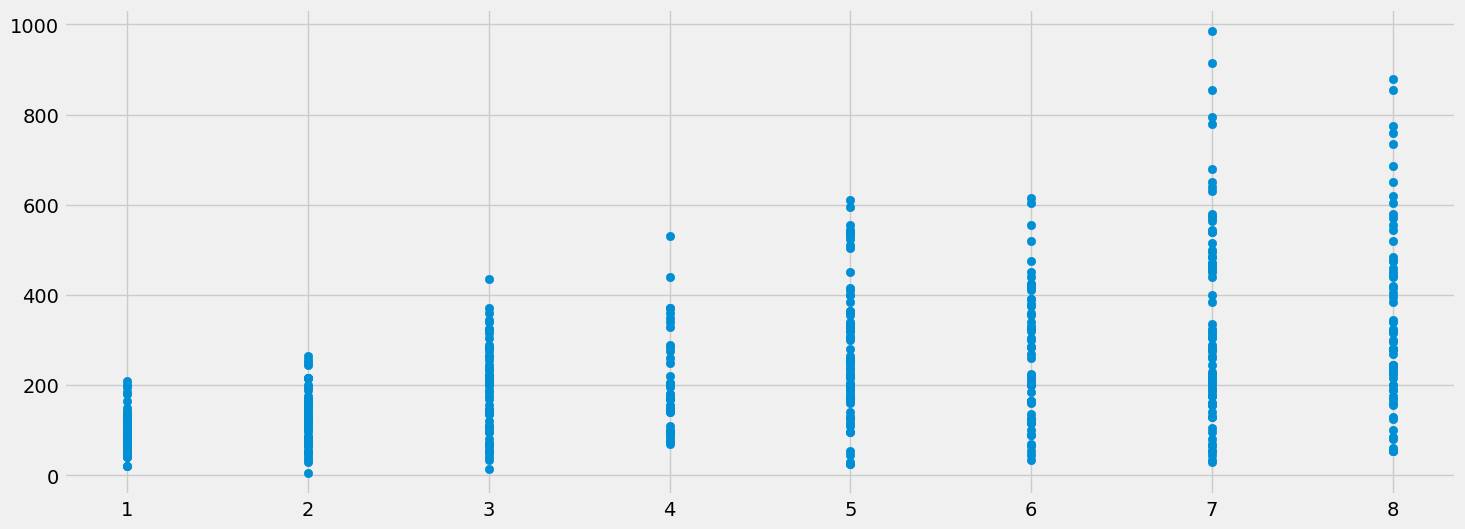

In [13]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,6))
plt.scatter(df['person'],df['tips'])
plt.show()

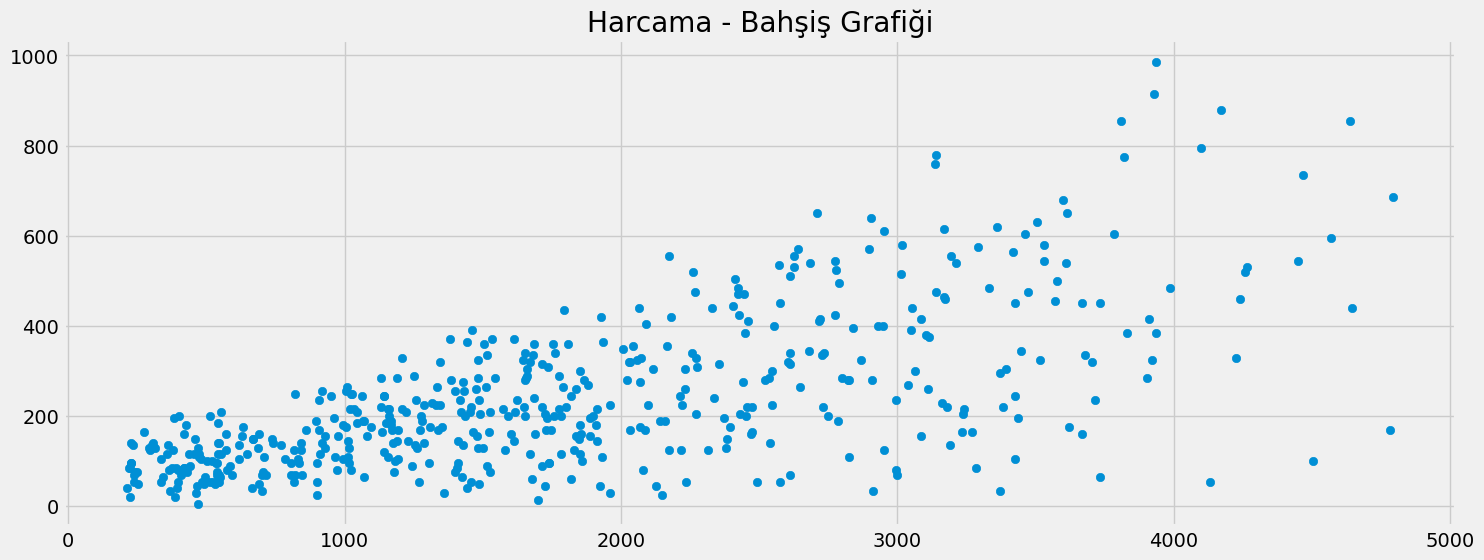

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,6))
plt.scatter(df['total'],df['tips'])
#plt.plot(df['total'],df['tahmin_tip'])
plt.title("Harcama - Bahşiş Grafiği")
plt.show()